In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load weather data 
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
# number of total rows and columns 
df.shape

(1461, 6)

In [4]:
# Getting data information, basically column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
# checking null or blank values in each column
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
# getting types of values from categorical column
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

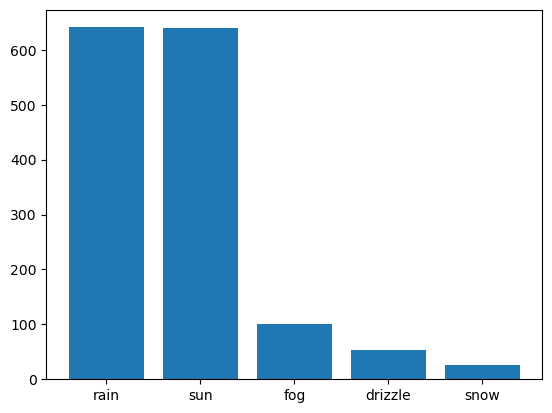

In [7]:
# plotting graph of weather (bar plot for categorical data type)
plt.bar(list(df['weather'].value_counts().keys()),(list(df['weather'].value_counts())))
plt.show()

In [8]:
df.groupby(['date','wind'],sort=True).sum()


,,precipitation,temp_max,temp_min
date,wind,,,
2012-01-01,4.7,0.0,12.8,5.0
2012-01-02,4.5,10.9,10.6,2.8
2012-01-03,2.3,0.8,11.7,7.2
2012-01-04,4.7,20.3,12.2,5.6
2012-01-05,6.1,1.3,8.9,2.8
...,...,...,...,...
2015-12-27,2.9,8.6,4.4,1.7
2015-12-28,1.3,1.5,5.0,1.7
2015-12-29,2.6,0.0,7.2,0.6


In [9]:
# getting 10 largest value according to wind column.
df.nlargest(10,'wind')

,date,precipitation,temp_max,temp_min,wind,weather
351,2012-12-17,2.0,8.3,1.7,9.5,rain
700,2013-12-01,3.0,13.3,7.8,8.8,rain
741,2014-01-11,21.3,14.4,7.2,8.8,rain
20,2012-01-21,3.0,8.3,3.3,8.2,rain
48,2012-02-18,6.4,6.7,3.9,8.1,rain
418,2013-02-22,9.4,7.8,3.9,8.1,rain
742,2014-01-12,1.5,11.1,5.6,8.1,rain
120,2012-04-30,4.3,12.8,7.2,8.0,rain
1416,2015-11-17,29.5,13.3,6.7,8.0,rain
671,2013-11-02,12.7,14.4,8.3,7.9,rain


In [10]:
# Getting 5 largest values of precipitation column
df.nlargest(5,'precipitation')

,date,precipitation,temp_max,temp_min,wind,weather
1169,2015-03-15,55.9,10.6,6.1,4.2,rain
323,2012-11-19,54.1,13.3,8.3,6.0,rain
1437,2015-12-08,54.1,15.6,10.0,6.2,rain
1413,2015-11-14,47.2,9.4,6.1,4.5,rain
794,2014-03-05,46.7,15.6,10.6,3.9,rain


In [11]:
# getting all mean and standard deviation of all integer datat type columns
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [12]:
# removing date and weather column as it will not be used as x. All other columns will be included in x except date and weather.
x = df.drop(columns = ['date','weather'],axis = 1)

In [13]:
# getting weather column as y
y = df['weather']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# breaking the dataframe into training set and testing set. 
#traing set will have 80% of data and testing set will have 20% data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [16]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
# model creation
model = DecisionTreeClassifier()


In [18]:
# fitting the training data into Decision Tree Classifier model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
# predicting the pattern analysed by the model from training data
X_train_prediction = model.predict(x_train)
print(X_train_prediction)

['sun' 'sun' 'sun' ... 'sun' 'sun' 'rain']


In [20]:
# Getting the accuracy of the training data by comparing the value of training data output that is y and prediction made by model on training data.
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9965753424657534


In [21]:
# now prediction of testing data and finding its accuracy
X_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of training data : ', testing_data_accuracy)

Accuracy score of training data :  0.7781569965870307


In [22]:
# Building a confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test, X_test_prediction)
c_matrix

array([[  2,   1,   0,   0,   7],
       [  0,   4,   1,   0,   7],
       [  0,   0, 123,   3,   7],
       [  0,   0,   1,   7,   0],
       [  9,  20,   9,   0,  92]], dtype=int64)

### claculate TP FP TN and FN

In [23]:
# True Positive
TP = np.diag(c_matrix)
print(TP)

[  2   4 123   7  92]


In [24]:
# False Postive
FP = np.sum(c_matrix,axis = 0)-TP
print(FP)

[ 9 21 11  3 21]


In [25]:
# False Negative
FN = np.sum(c_matrix,axis=1)-TP
print(FN)

[ 8  8 10  1 38]


In [26]:
# calculating Precision
precision = TP /(TP+FP)
print(precision)

[0.18181818 0.16       0.91791045 0.7        0.81415929]


In [27]:
# calculating Recall
recall = TP/(TP + FN)
print(recall)

[0.2        0.33333333 0.92481203 0.875      0.70769231]


In [33]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test,X_test_prediction, average = "micro")
print(precision)

0.7781569965870307


In [35]:
recall = recall_score(y_test,X_test_prediction,average = "micro")
print(recall)

0.7781569965870307
